In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


In [2]:
df_all=pd.read_excel('../data_v3/전국경락단가.xlsx')
df_18_price=pd.read_excel('../../원본데이터/18년도 가격데이터.xlsx')
df_19_price=pd.read_excel('../../원본데이터/19년도 가격데이터.xlsx')
df_20_price=pd.read_excel('../../원본데이터/20년도 가격데이터1.xlsx')
df_21_price=pd.read_excel('../../원본데이터/21년도 가격데이터.xlsx')

C:\Users\jaemin\Anaconda3\envs\jm\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.


In [3]:
#첫번째 행 삭제
df_18_price.drop(0,axis=0,inplace=True)
df_19_price.drop(0,axis=0,inplace=True)
#df_20_price.drop(0,axis=0,inplace=True)
df_21_price.drop(0,axis=0,inplace=True)

In [4]:
df_18_price['도축일']=pd.to_datetime(df_18_price['도축일'].astype(str))
df_19_price['도축일']=pd.to_datetime(df_19_price['도축일'].astype(str))
df_20_price['도축일']=pd.to_datetime(df_20_price['도축일'].astype(str))
df_21_price['도축일']=pd.to_datetime(df_21_price['도축일'].astype(str))

### 크롤링한 도매가격

In [5]:
df_all['date']=pd.to_datetime(df_all['date'])
df_all['price'] = df_all['price'].astype(int)

In [6]:
df_sorted = df_all.sort_values(by='date')

In [7]:
df_sorted.tail()

,date,price
999,2021-12-27,4825
1000,2021-12-28,4674
1001,2021-12-29,4904
1002,2021-12-30,5000
1003,2021-12-31,5062


### 한 경매장에서의 도매가격

In [8]:
df_price=pd.concat([df_18_price,df_19_price,df_20_price,df_21_price])

In [9]:
df_price_all=df_price[['업체코드','업체명','도축일','도체번호','경락단가']]

In [10]:
df_price_all_2column=df_price_all[['도축일',"경락단가"]]

df_price_all_2column.shape

(224201, 2)

In [11]:
df_price_all_2column.head()

,도축일,경락단가
1,2018-01-02,3622.0
2,2018-01-02,3755.0
3,2018-01-02,3700.0
4,2018-01-02,3733.0
5,2018-01-02,2199.0


In [12]:
df_price_all_2column['경락단가_평균'] = df_price_all_2column.groupby(['도축일'])['경락단가'].transform('mean')

df_price_all_2column.head()

df_price_all_2column=df_price_all_2column.groupby(df_price_all_2column['도축일']).mean()

df_price_all_2column.reset_index(inplace=True)

C:\Users\jaemin\Anaconda3\envs\jm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_price_all_2column.tail()

,도축일,경락단가,경락단가_평균
858,2021-12-27,4547.071429,4547.071429
859,2021-12-28,4373.212544,4373.212544
860,2021-12-29,4278.649485,4278.649485
861,2021-12-30,4322.080986,4322.080986
862,2021-12-31,4138.037190,4138.037190


In [14]:
df_price_all_2column[df_price_all_2column['도축일']=='2018-01-02']

,도축일,경락단가,경락단가_평균
0,2018-01-02,3750.366093,3750.366093


### 하나의 데이터셋 만들기

In [15]:
df_merged=pd.merge(df_sorted, df_price_all_2column, left_on = 'date', right_on = '도축일', how = 'left')

In [16]:
df_merged.fillna(method= 'ffill',inplace=True)

In [17]:
df_merged

,date,price,도축일,경락단가,경락단가_평균
0,2018-01-02,4104,2018-01-02,3750.366093,3750.366093
1,2018-01-03,4049,2018-01-03,3547.574932,3547.574932
2,2018-01-04,3920,2018-01-04,3696.060897,3696.060897
3,2018-01-05,3917,2018-01-05,3770.156364,3770.156364
4,2018-01-08,4090,2018-01-08,3809.974684,3809.974684
...,...,...,...,...,...
999,2021-12-27,4825,2021-12-27,4547.071429,4547.071429
1000,2021-12-28,4674,2021-12-28,4373.212544,4373.212544
1001,2021-12-29,4904,2021-12-29,4278.649485,4278.649485
1002,2021-12-30,5000,2021-12-30,4322.080986,4322.080986


### 도매가격 그래프

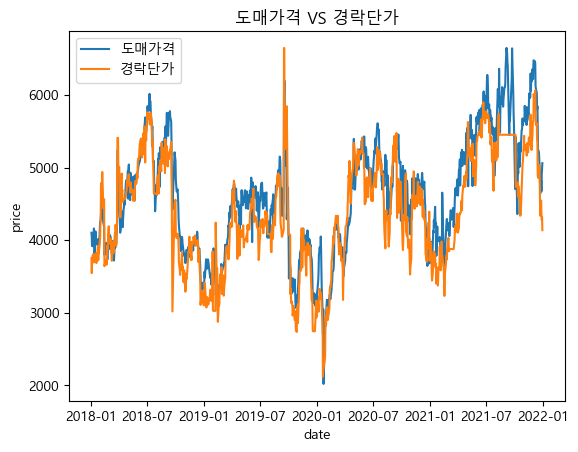

In [18]:
import matplotlib.pyplot as plt

# 데이터
x = df_merged['date']
y = df_merged['price']
y2=df_merged['경락단가_평균']

# 그래프 그리기
plt.plot(x, y,label='도매가격')
plt.plot(x, y2,label='경락단가')
# 그래프 타이틀 및 축 레이블 설정
plt.title('도매가격 VS 경락단가')
plt.xlabel('date')
plt.ylabel('price')

# 범례 추가
plt.legend()
# 그래프 표시
plt.show()


In [19]:
pred_inverse=df_merged['경락단가_평균']
testY_inverse=df_merged['price']

In [22]:
def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAE SCORE : ', MAE(pred_inverse, testY_inverse))

#MAE
from sklearn.metrics import mean_absolute_error

print("MAE",mean_absolute_error(testY_inverse,pred_inverse))

#MSE
from sklearn.metrics import mean_squared_error

print("MSE",mean_squared_error(testY_inverse,pred_inverse))

#RMSE
import numpy as np
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(testY_inverse,pred_inverse)
print("RMSE",np.sqrt(MSE))
# sklearn 은 mse만 제공하기 때문에 rmse는 직접 만들어 써야한다.

#MAPE
import numpy as np

def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
print("MAPE",MAPE(testY_inverse, pred_inverse))

MAE SCORE :  313.567002745093
MAE 313.567002745093
MSE 150469.93865776763
RMSE 387.9045483849959
MAPE 6.8051568805817535


In [21]:
new_df_price_all_2column['경락단가_평균']

NameError: name 'new_df_price_all_2column' is not defined